In [21]:
#Import the dependencies
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
FLT_EPSILON = 1e-4


In [22]:
# Load Data 
df = pd.read_csv('datasets/ex1data1.csv')
print(df)


Population    Profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
..         ...       ...
92      5.8707   7.20290
93      5.3054   1.98690
94      8.2934   0.14454
95     13.3940   9.05510
96      5.4369   0.61705

[97 rows x 2 columns]


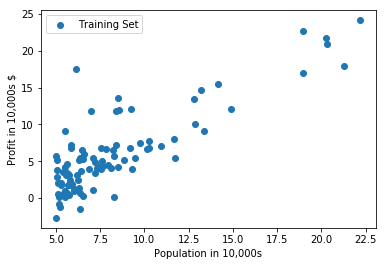

In [29]:
plt.figure(1)
plt.scatter(df['Population'], df['Profit'], label = 'Training Set')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000s $')
plt.legend()

In [24]:
def compute_univariate_cost_function(X : np.ndarray  , theta : np.ndarray, y:np.ndarray) -> float:

    ''' X : np.array with  2 x N dimensions
        theta : np.array with 2 x 1 dimensions
        y : np.array with  1 x N dimensions
    '''
    J_theta = np.mean((theta.transpose().dot(X) - y) ** 2) / (2)
    return J_theta

def gradient_descent_univariate (X : np.ndarray  , theta : np.ndarray, y:np.ndarray, number_of_iterations :int, alpha:float) -> tuple:
    temp = np.zeros_like(theta)

    for n in range(number_of_iterations):
        temp[0] = theta[0] - alpha * np.mean(theta.transpose().dot(X) - y)
        temp[1] = theta[1] - alpha * np.mean((theta.transpose().dot(X) - y) * X.transpose()[:, 1])
        theta = np.array((temp[0], temp[1]))
        J = compute_univariate_cost_function(X, theta, y)

    return theta, J

In [15]:
# COMPUTE COST FUNCTION AND TEST FOR GIVEN THETAS
X = df['Population'].to_numpy()
y = df['Profit'].to_numpy()
ones = np.ones_like(X)
X = np.vstack((np.ones_like(X), X))
theta =  np.zeros((2,1))

J_theta = compute_univariate_cost_function(X, theta, y)
assert J_theta - 32.0727 < FLT_EPSILON

theta = np.array((-1,2))
J_theta = compute_univariate_cost_function(X, theta, y)
assert J_theta - 54.2425 < FLT_EPSILON


In [25]:
# GRADIENT DESCENT
theta = np.zeros((2,1))
number_of_iterations = 1500
alpha = 0.01

theta, J = gradient_descent_univariate(X, theta, y, number_of_iterations, alpha)
print(f'Final theta {theta} with cost function {J}')

#PLOT FITTED DATA TO THE LINE
predicted_profit = theta.transpose().dot(X)
df['Predicted_Profit'] = pd.Series(predicted_profit[0], index=df.index)
print(df)

Final theta [[-3.63029144]
 [ 1.16636235]] with cost function 4.483388256587726
    Population    Profit  Predicted_Profit
0       6.1101  17.59200          3.496299
1       5.5277   9.13020          2.817010
2       8.5186  13.66200          6.305483
3       7.0032  11.85400          4.537977
4       5.8598   6.82330          3.204359
..         ...       ...               ...
92      5.8707   7.20290          3.217072
93      5.3054   1.98690          2.557727
94      8.2934   0.14454          6.042818
95     13.3940   9.05510         11.991966
96      5.4369   0.61705          2.711104

[97 rows x 3 columns]


In [26]:
#PREDICT VALUES FOR POPULATION OF 35,000 and 70,000
profit_1 = np.array([1, 3.5]).transpose().dot(theta) * 10000
profit_2 = np.array([1, 7.0]).transpose().dot(theta) * 10000

print(f'Profit for population of 35000 is {profit_1}')
print(f'Profit for population of 70000 is {profit_2}')

Profit for population of 35000 is [4519.7678677]
Profit for population of 70000 is [45342.45012945]


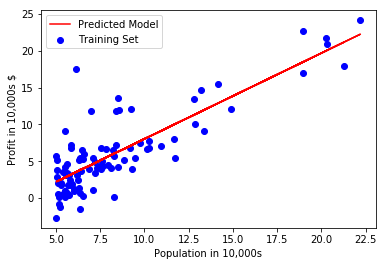

In [33]:
#PLOT PREDICTED MODEL WITH TRAINING SET 
plt.figure(1)
plt.scatter(df['Population'], df['Profit'], label = 'Training Set', color = 'blue')
plt.plot(df['Population'], df['Predicted_Profit'], label = 'Predicted Model', color = 'red')
plt.xlabel('Population in 10,000s')
plt.ylabel('Profit in 10,000s $')
plt.legend()
plt.show()